# Yield Prediction using Molecular Chemical Language Model Embedding Condensation_reactions

Found this dataset from a recent publication by a D.M. Makarov et al. (Journal of Computational Science 74 (2023) 102173) (https://doi.org/10.1016/j.jocs.2023.102173)

"""We considered pyrrole or dipyrromethane condensation reactions with various aldehydes, resulting in the production of boron(III) dipyrromethene or BODIPY (681 records). These reactions were retrieved from articles (see “Dataset reactions” and Scheme S1). Addi tionally, we used the reactions of the production of dipyrromethane (111 records) and porphyrins (457 records). All condensation reactions for dipyrromethanes and 213 reactions for porphyrins with various al dehydes were obtained in our laboratory. The remaining 244 reactions for the porphyrins synthesis were obtained from articles (see “Dataset reactions”). Our experimental dataset is based on a study of pyrrole condensation processes with aldehydes, using catalytic amounts of organic acids to produce ms-aryl- and ß-alkyl-substituted dipyrro methanes. """

The objective of this notebook is to introduce a method for predicting yield

As a beginner, there may be numerous opportunities for improvement in this notebook. I was largely inspired by the work of D.M. Makarov et al and the STEPHEN LEE's notebook (BELKA: Molecule Representations for ML Tutorial) thanks to them.

## Data

In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_row', 211)
pd.set_option('display.max_columns',211)

In [7]:
# Téléchargement du Dataset 
DataFrame1 = r"C:\Users\loris\Condensation_reactions\cb_embeddings_df.csv"
DataFrame2 = r"C:\Users\loris\Desktop\IA_chemistry\Dipyrromethanes_condensation_reactions-main\Condensation_reactions - Copie.xlsx"

df1 = pd.read_csv(DataFrame1)
df2 = pd.read_excel(DataFrame2)

df1 = df1.copy()
df2 = df2.copy()

print(df1.shape, df2.shape)

(1249, 385) (1249, 4)


In [9]:
df_final = pd.concat([df1, df2], axis=1)

In [10]:
df_final.head() 

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,...,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,SMILES,yield,Temperature,Ind
0,0,-0.162271,0.359961,-0.208631,0.212792,-0.184559,0.023665,0.031174,-0.056128,0.070213,0.246463,0.404678,0.222561,0.246697,0.569248,-0.286271,0.163123,-0.211469,-0.137589,0.333122,0.270672,-0.171357,-0.007442,0.026922,0.093674,0.563860,0.190829,-0.260796,0.335964,0.166725,-0.452981,-0.144069,0.137669,0.074681,-0.076224,0.409972,-0.091544,-0.143137,-0.533438,-0.177174,0.303646,-0.170809,0.113998,-0.180275,-0.298499,0.129155,-0.358678,-0.197952,-0.127823,0.095293,0.146926,0.200765,-0.178596,0.116211,-0.196614,0.198353,0.067136,0.164220,0.255172,-0.430976,-0.052471,0.122035,-0.120684,0.194026,0.059159,-0.242641,0.216599,-0.209428,-0.450314,-0.067776,0.322422,0.050678,-0.037782,0.081106,0.362837,-0.256037,-0.186787,-0.048138,-0.397506,-0.240361,-0.247374,0.147705,0.132116,0.320903,-0.256691,-0.021490,-0.365033,-0.155543,0.344853,0.302176,-0.139125,0.172635,-0.128772,0.321327,0.151302,-0.063909,-0.135832,0.332110,-0.003239,0.258752,0.012680,-0.174956,0.260750,0.035437,0.454084,...,0.240884,0.096204,0.210107,0.152762,-0.285373,-0.281662,0.243171,0.335456,0.193422,-0.344888,-0.180593,0.024781,-0.214996,-0.305409,-0.109843,-0.137799,-0.499643,0.295993,0.223503,0.012261,-0.147910,0.103415,-0.091400,0.090393,0.178400,-0.128588,0.159457,0.131086,-0.192747,0.246661,-0.018331,-0.004980,0.066220,0.229715,0.022504,-0.275646,0.057845,0.330876,0.000617,-0.515452,0.235576,0.299304,0.124795,0.086530,0.011721,-0.124608,0.353909,0.176914,0.021789,-0.560504,-0.019877,0.027930,-0.026669,-0.124045,0.082781,-0.416438,0.100424,0.171194,-0.240402,-0.120383,-0.101247,-0.219663,-0.180439,0.171812,-0.378690,-0.122113,0.160866,0.131128,0.284670,0.330584,-0.425320,0.112695,0.506408,0.361750,-0.046845,0.007392,-0.070656,-0.199145,0.104572,-0.008363,-0.072674,-0.080588,-0.084459,0.144243,0.227459,-0.067456,-0.541151,0.081943,-0.373041,-0.345800,0.036262,0.095997,-0.096873,-0.063860,-0.114892,0.092941,-0.445563,-0.034386,-0.321318,-0.407256,0.045911,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,0.05,20,78
1,1,-0.164998,0.200312,-0.291708,0.385741,-0.113083,0.090308,-0.015352,0.234842,0.140149,0.200789,0.300456,0.268847,0.327487,0.552415,-0.058277,0.069845,-0.283775,0.059433,0.132053,0.206883,0.020623,-0.173855,0.225282,-0.017904,0.497691,0.216123,-0.304758,0.297272,0.063490,-0.155111,0.192790,0.090803,0.076976,0.226654,0.310238,-0.049298,0.095382,-0.430092,-0.348674,-0.033861,0.297530,0.052408,-0.273249,-0.018303,0.000791,-0.184625,-0.371987,-0.196453,0.265759,-0.089040,0.163914,-0.434184,0.054147,-0.180023,0.367596,0.134108,0.269924,0.013862,-0.086283,0.153577,-0.441175,-0.102963,0.169320,0.168424,-0.019549,0.066295,0.027417,-0.022250,0.115971,-0.026206,0.111903,0.134881,0.163826,0.415292,-0.045816,0.029169,-0.002534,-0.437910,-0.069225,0.127752,-0.087582,0.209030,-0.017341,-0.325876,0.031164,-0.381508,-0.209271,0.060853,-0.095384,-0.291828,-0.112984,-0.085400,-0.271536,-0.287510,-0.201039,-0.028334,0.257096,0.126726,-0.001215,0.055023,0.019923,0.145393,0.170775,0.345924,...,0.135569,-0.035710,0.130619,0.011335,-0.017847,-0.136202,0.259121,-0.040067,0.328404,-0.241552,0.123093,-0.204784,-0.206881,-0.301866,-0.098708,-0.209272,-0.543192,0.190023,0.235180,-0.119917,0.086322,0.212423,-0.129963,0.174801,0.025072,-0.20

In [11]:
df_final = df_final.drop(["Unnamed: 0"], axis=1)

In [12]:
df_final.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,...,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,SMILES,yield,Temperature,Ind
0,-0.162271,0.359961,-0.208631,0.212792,-0.184559,0.023665,0.031174,-0.056128,0.070213,0.246463,0.404678,0.222561,0.246697,0.569248,-0.286271,0.163123,-0.211469,-0.137589,0.333122,0.270672,-0.171357,-0.007442,0.026922,0.093674,0.563860,0.190829,-0.260796,0.335964,0.166725,-0.452981,-0.144069,0.137669,0.074681,-0.076224,0.409972,-0.091544,-0.143137,-0.533438,-0.177174,0.303646,-0.170809,0.113998,-0.180275,-0.298499,0.129155,-0.358678,-0.197952,-0.127823,0.095293,0.146926,0.200765,-0.178596,0.116211,-0.196614,0.198353,0.067136,0.164220,0.255172,-0.430976,-0.052471,0.122035,-0.120684,0.194026,0.059159,-0.242641,0.216599,-0.209428,-0.450314,-0.067776,0.322422,0.050678,-0.037782,0.081106,0.362837,-0.256037,-0.186787,-0.048138,-0.397506,-0.240361,-0.247374,0.147705,0.132116,0.320903,-0.256691,-0.021490,-0.365033,-0.155543,0.344853,0.302176,-0.139125,0.172635,-0.128772,0.321327,0.151302,-0.063909,-0.135832,0.332110,-0.003239,0.258752,0.012680,-0.174956,0.260750,0.035437,0.454084,0.084206,...,0.240884,0.096204,0.210107,0.152762,-0.285373,-0.281662,0.243171,0.335456,0.193422,-0.344888,-0.180593,0.024781,-0.214996,-0.305409,-0.109843,-0.137799,-0.499643,0.295993,0.223503,0.012261,-0.147910,0.103415,-0.091400,0.090393,0.178400,-0.128588,0.159457,0.131086,-0.192747,0.246661,-0.018331,-0.004980,0.066220,0.229715,0.022504,-0.275646,0.057845,0.330876,0.000617,-0.515452,0.235576,0.299304,0.124795,0.086530,0.011721,-0.124608,0.353909,0.176914,0.021789,-0.560504,-0.019877,0.027930,-0.026669,-0.124045,0.082781,-0.416438,0.100424,0.171194,-0.240402,-0.120383,-0.101247,-0.219663,-0.180439,0.171812,-0.378690,-0.122113,0.160866,0.131128,0.284670,0.330584,-0.425320,0.112695,0.506408,0.361750,-0.046845,0.007392,-0.070656,-0.199145,0.104572,-0.008363,-0.072674,-0.080588,-0.084459,0.144243,0.227459,-0.067456,-0.541151,0.081943,-0.373041,-0.345800,0.036262,0.095997,-0.096873,-0.063860,-0.114892,0.092941,-0.445563,-0.034386,-0.321318,-0.407256,0.045911,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,0.05,20,78
1,-0.164998,0.200312,-0.291708,0.385741,-0.113083,0.090308,-0.015352,0.234842,0.140149,0.200789,0.300456,0.268847,0.327487,0.552415,-0.058277,0.069845,-0.283775,0.059433,0.132053,0.206883,0.020623,-0.173855,0.225282,-0.017904,0.497691,0.216123,-0.304758,0.297272,0.063490,-0.155111,0.192790,0.090803,0.076976,0.226654,0.310238,-0.049298,0.095382,-0.430092,-0.348674,-0.033861,0.297530,0.052408,-0.273249,-0.018303,0.000791,-0.184625,-0.371987,-0.196453,0.265759,-0.089040,0.163914,-0.434184,0.054147,-0.180023,0.367596,0.134108,0.269924,0.013862,-0.086283,0.153577,-0.441175,-0.102963,0.169320,0.168424,-0.019549,0.066295,0.027417,-0.022250,0.115971,-0.026206,0.111903,0.134881,0.163826,0.415292,-0.045816,0.029169,-0.002534,-0.437910,-0.069225,0.127752,-0.087582,0.209030,-0.017341,-0.325876,0.031164,-0.381508,-0.209271,0.060853,-0.095384,-0.291828,-0.112984,-0.085400,-0.271536,-0.287510,-0.201039,-0.028334,0.257096,0.126726,-0.001215,0.055023,0.019923,0.145393,0.170775,0.345924,-0.001274,...,0.135569,-0.035710,0.130619,0.011335,-0.017847,-0.136202,0.259121,-0.040067,0.328404,-0.241552,0.123093,-0.204784,-0.206881,-0.301866,-0.098708,-0.209272,-0.543192,0.190023,0.235180,-0.119917,0.086322,0.212423,-0.129963,0.174801,0.0250

In [13]:
df_final.shape

(1249, 388)

In [14]:
df =df_final.copy()

## Missing values

In [16]:
# Recherche des valeurs manquantes
missing_values = df.isnull().sum().max()
missing_values

0

## target 

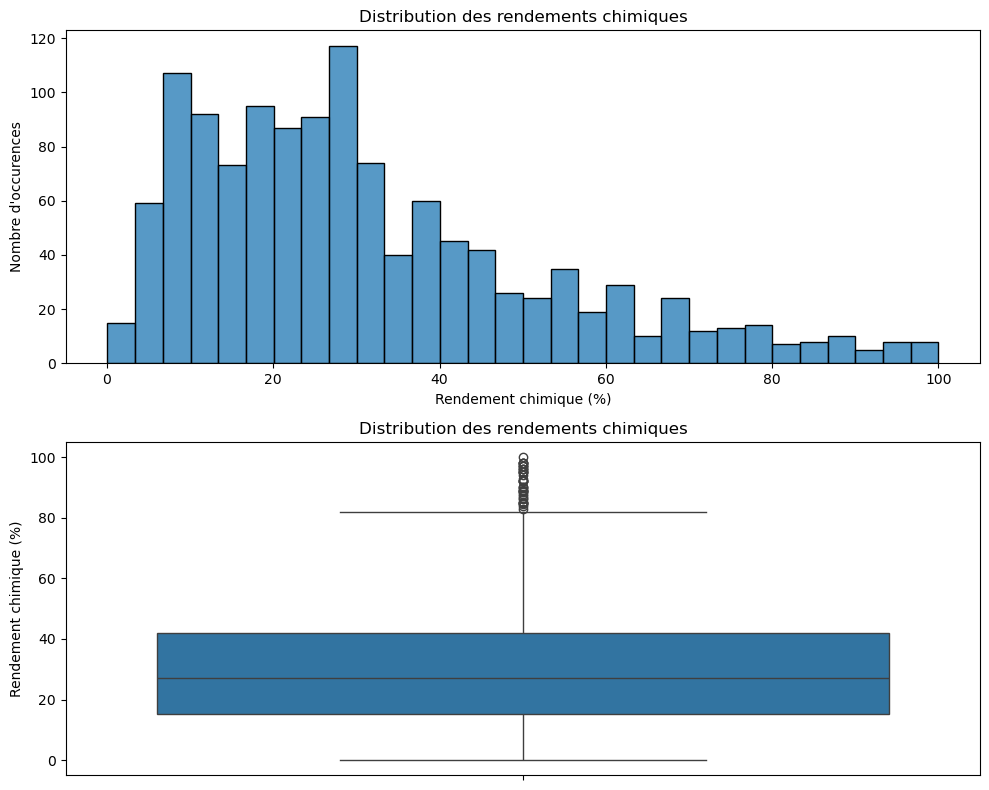

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure et des axes pour les subplots
fig, axs = plt.subplots(2, 1, figsize=(10,8))

# Tracé de l'histogramme sur le premier subplot
sns.histplot(data=df, x='yield', bins=30, ax=axs[0])
axs[0].set_xlabel('Rendement chimique (%)')
axs[0].set_ylabel("Nombre d'occurences")
axs[0].set_title("Distribution des rendements chimiques")

# Tracé du boxplot sur le deuxième subplot
sns.boxplot(df["yield"], ax=axs[1])
axs[1].set_ylabel("Rendement chimique (%)")
axs[1].set_title("Distribution des rendements chimiques")

# Ajustement de l'espacement entre les subplots
plt.tight_layout()

# Affichage des graphiques 
plt.show()

## 🤖 Chemical Language Model Embeddings

Just as traditional language models use self-attention mechanisms to compute the representation of each language element (e.g. word in a sentence) to every other element, chemical language models use the same principle in which elements are some chemical unit (e.g. atoms) instead of words.

Below is example code to obtain learned transformer-based embeddings from two chemical language models:

ChemBERTa: adapted for chemical SMILES from the RoBERTa architecture, trained on a dataset of 77 million molecules

MoLFormer: another transformer-based model adapted for SMILES but trained on a larger dataset (1.1 billion molecules!)


References:

Chithrananda, S., Grand, G., & Ramsundar, B. (2020). ChemBERTa: Large-Scale Self-Supervised Pretraining for Molecular Property Prediction.
    
Chithrananda, S., Grand, G., & Ramsundar, B. (2022). ChemBERTa-2: Towards Chemical Foundation Models. 

Ross, J., Belgodere, B., Chenthamarakshan, V., et al. (2022). Large-scale chemical language representations capture molecular structure and properties. 
Nature Machine Intelligence, 4, 1256-1264. 

ChemBERTa on HuggingFace Model Repo

MolFormer on HuggingFace Model Repo

MolFormer GitHub repo

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [7]:
def change_smile(df, columns_names):
    df["SMILES_2"] = df[columns_names].replace('>>','.', regex=True)
    return df 

In [8]:
def Mols(df, columns_names):
    df['mols'] = pd.Series(df[columns_names]).apply(Chem.MolFromSmiles)
    return df 

In [9]:
df = change_smile(df, "SMILES")

In [10]:
df = Mols(df, "SMILES_2")

[16:25:30] Explicit valence for atom # 26 H, 2, is greater than permitted
[16:25:31] Explicit valence for atom # 26 H, 2, is greater than permitted
[16:25:31] Explicit valence for atom # 0 O, 3, is greater than permitted
[16:25:31] Explicit valence for atom # 10 O, 3, is greater than permitted


In [11]:
df.head()

,SMILES,yield,Temperature,Ind,SMILES_2,mols
0,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,0.05,20,78,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,<rdkit.Chem.rdchem.Mol object at 0x000001FA29E...
1,O=Cc1ccccc1OCCOC(=O)C#CC(=O)OCCOc1ccccc1C=O.c1...,1.00,40,909,O=Cc1ccccc1OCCOC(=O)C#CC(=O)OCCOc1ccccc1C=O.c1...,<rdkit.Chem.rdchem.Mol object at 0x000001FA29E...
2,c1cc[nH]c1.Cc1cc(C)c(C=O)c(C)c1.COC(=O)c1ccc(C...,2.00,20,747,c1cc[nH]c1.Cc1cc(C)c(C=O)c(C)c1.COC(=O)c1ccc(C...,<rdkit.Chem.rdchem.Mol object at 0x000001FA29E...
3,CC(C)(C)c1ccc(OCCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C...,2.10,20,77,CC(C)(C)c1ccc(OCCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C...,<rdkit.Chem.rdchem.Mol object at 0x000001FA29E...
4,Cc1ccc(-c2ccccc2C=O)cc1.Fc1c(F)c(F)c(C(c2ccc[n...,2.50,25,266,Cc1ccc(-c2ccccc2C=O)cc1.Fc1c(F)c(F)c(C(c2ccc[n...,<rdkit.Chem.rdchem.Mol object at 0x000001FA29E...


### Enlève les dernières valeurs manquantes

In [12]:
df.isnull().sum()

SMILES         0
yield          0
Temperature    0
Ind            0
SMILES_2       0
mols           4
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

SMILES         0
yield          0
Temperature    0
Ind            0
SMILES_2       0
mols           0
dtype: int64

In [15]:
df.shape

(1245, 6)

## Model 

In [18]:
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statistics import mean, stdev

### Model_random_forest_regression

In [19]:
def random_forest_regression(X, y):
    rmse_scores = []
    r2_scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = RandomForestRegressor(n_estimators=120, max_depth=25)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        #print(f"Iteration {i}: RMSE = {rmse:.3f}, R^2  = {r2:.3f}")
    # Retourner la moyenne et l'écart-type des scores
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)
    
    print("\nAverage performance of test set at 10 split")
    print("Metric\tavg\tstdev")
    print("R^2\t%.2f\t%.2f" % (mean(r2_scores), stdev(r2_scores)))
    print("RMSE\t%.2f\t%.2f" % (mean(rmse_scores), stdev(rmse_scores)))

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statistics import mean, stdev

def statistics_for_the_training_set_with_5CV_RFR(X, y):
    r2_scores = []
    rmse_scores = []
    
    for i in range(10):
        X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=i)
        X_tr.reset_index(drop=True, inplace=True)
        y_tr.reset_index(drop=True, inplace=True)
        
        cv = KFold(n_splits=5, shuffle=True, random_state=1)
        fold_r2_scores = []
        fold_rmse_scores = []
        
        for train_index, test_index in cv.split(X_tr):
            X_train, X_test = X_tr.loc[train_index].values, X_tr.loc[test_index].values
            y_train, y_test = y_tr.loc[train_index].values, y_tr.loc[test_index].values
            
            model = RandomForestRegressor(n_estimators=120, max_depth=25)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            fold_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            fold_r2_scores.append(r2_score(y_test, y_pred))
        
        # Moyennes et écarts-types des scores pour chaque pli
        rmse_scores.append(mean(fold_rmse_scores))
        r2_scores.append(mean(fold_r2_scores))
    
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)


### Model CatBoost

In [21]:
# Importer CatBoost après l'installation
import catboost

In [22]:
def catboost_regression(X, y):
    rmse_scores = []
    r2_scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = catboost.CatBoostRegressor(learning_rate=0.02, l2_leaf_reg=9.5, depth=7, silent=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        #print(f"Iteration {i}: RMSE = {rmse:.3f}, R2 = {r2:.3f}")
    
    # Retourner la moyenne et l'écart-type des scores
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)
    
    print("\nAverage performance of test set at 10 split")
    print("Metric\tavg\tstdev")
    print("R^2\t%.2f\t%.2f" % (mean(r2_scores), stdev(r2_scores)))
    print("RMSE\t%.2f\t%.2f" % (mean(rmse_scores), stdev(rmse_scores)))

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statistics import mean, stdev

def statistics_for_the_training_set_with_5CV_catBoost(X, y):
    r2_scores = []
    rmse_scores = []
    
    for i in range(10):
        X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=i)
        X_tr.reset_index(drop=True, inplace=True)
        y_tr.reset_index(drop=True, inplace=True)
        
        cv = KFold(n_splits=5, shuffle=True, random_state=1)
        fold_r2_scores = []
        fold_rmse_scores = []
        
        for train_index, test_index in cv.split(X_tr):
            X_train, X_test = X_tr.loc[train_index].values, X_tr.loc[test_index].values
            y_train, y_test = y_tr.loc[train_index].values, y_tr.loc[test_index].values
            
            model = catboost.CatBoostRegressor(learning_rate=0.02, l2_leaf_reg=9.5, depth=7, silent=True)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            fold_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            fold_r2_scores.append(r2_score(y_test, y_pred))
        
        # Moyennes et écarts-types des scores pour chaque pli
        rmse_scores.append(mean(fold_rmse_scores))
        r2_scores.append(mean(fold_r2_scores))
    
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)


## Result Model

In [87]:
import time
import pandas as pd
from tqdm import tqdm

def run_and_compare_models(X, y):
    models = {
        "Random_Forest": random_forest_regression,
        "Random_Forest_Kfold": statistics_for_the_training_set_with_5CV_RFR,
        "CatBoost": catboost_regression,
        "CatBoostKflod": statistics_for_the_training_set_with_5CV_catBoost
    }
    
    results = []
    
    for model_name, model_func in tqdm(models.items(), desc="Running models"):
        start_time = time.time()
        rmse_avg, rmse_std, r2_avg, r2_std = model_func(X, y)
        end_time = time.time()  # Arrêter le chronomètre
        elapsed_time = end_time - start_time
        results.append({
            "Model": model_name,
            "RMSE Avg": rmse_avg,
            "RMSE Std": rmse_std,
            "R^2 Avg": r2_avg,
            "R^2 Std": r2_std,
            "Time (s)": elapsed_time  # Ajouter le temps écoulé à chaque entrée
        })
        
    results_df = pd.DataFrame(results)
    return results_df


In [24]:
df.shape

(1249, 388)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,...,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,SMILES,yield,Temperature,Ind
0,-0.162271,0.359961,-0.208631,0.212792,-0.184559,0.023665,0.031174,-0.056128,0.070213,0.246463,0.404678,0.222561,0.246697,0.569248,-0.286271,0.163123,-0.211469,-0.137589,0.333122,0.270672,-0.171357,-0.007442,0.026922,0.093674,0.563860,0.190829,-0.260796,0.335964,0.166725,-0.452981,-0.144069,0.137669,0.074681,-0.076224,0.409972,-0.091544,-0.143137,-0.533438,-0.177174,0.303646,-0.170809,0.113998,-0.180275,-0.298499,0.129155,-0.358678,-0.197952,-0.127823,0.095293,0.146926,0.200765,-0.178596,0.116211,-0.196614,0.198353,0.067136,0.164220,0.255172,-0.430976,-0.052471,0.122035,-0.120684,0.194026,0.059159,-0.242641,0.216599,-0.209428,-0.450314,-0.067776,0.322422,0.050678,-0.037782,0.081106,0.362837,-0.256037,-0.186787,-0.048138,-0.397506,-0.240361,-0.247374,0.147705,0.132116,0.320903,-0.256691,-0.021490,-0.365033,-0.155543,0.344853,0.302176,-0.139125,0.172635,-0.128772,0.321327,0.151302,-0.063909,-0.135832,0.332110,-0.003239,0.258752,0.012680,-0.174956,0.260750,0.035437,0.454084,0.084206,...,0.240884,0.096204,0.210107,0.152762,-0.285373,-0.281662,0.243171,0.335456,0.193422,-0.344888,-0.180593,0.024781,-0.214996,-0.305409,-0.109843,-0.137799,-0.499643,0.295993,0.223503,0.012261,-0.147910,0.103415,-0.091400,0.090393,0.178400,-0.128588,0.159457,0.131086,-0.192747,0.246661,-0.018331,-0.004980,0.066220,0.229715,0.022504,-0.275646,0.057845,0.330876,0.000617,-0.515452,0.235576,0.299304,0.124795,0.086530,0.011721,-0.124608,0.353909,0.176914,0.021789,-0.560504,-0.019877,0.027930,-0.026669,-0.124045,0.082781,-0.416438,0.100424,0.171194,-0.240402,-0.120383,-0.101247,-0.219663,-0.180439,0.171812,-0.378690,-0.122113,0.160866,0.131128,0.284670,0.330584,-0.425320,0.112695,0.506408,0.361750,-0.046845,0.007392,-0.070656,-0.199145,0.104572,-0.008363,-0.072674,-0.080588,-0.084459,0.144243,0.227459,-0.067456,-0.541151,0.081943,-0.373041,-0.345800,0.036262,0.095997,-0.096873,-0.063860,-0.114892,0.092941,-0.445563,-0.034386,-0.321318,-0.407256,0.045911,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,0.05,20,78
1,-0.164998,0.200312,-0.291708,0.385741,-0.113083,0.090308,-0.015352,0.234842,0.140149,0.200789,0.300456,0.268847,0.327487,0.552415,-0.058277,0.069845,-0.283775,0.059433,0.132053,0.206883,0.020623,-0.173855,0.225282,-0.017904,0.497691,0.216123,-0.304758,0.297272,0.063490,-0.155111,0.192790,0.090803,0.076976,0.226654,0.310238,-0.049298,0.095382,-0.430092,-0.348674,-0.033861,0.297530,0.052408,-0.273249,-0.018303,0.000791,-0.184625,-0.371987,-0.196453,0.265759,-0.089040,0.163914,-0.434184,0.054147,-0.180023,0.367596,0.134108,0.269924,0.013862,-0.086283,0.153577,-0.441175,-0.102963,0.169320,0.168424,-0.019549,0.066295,0.027417,-0.022250,0.115971,-0.026206,0.111903,0.134881,0.163826,0.415292,-0.045816,0.029169,-0.002534,-0.437910,-0.069225,0.127752,-0.087582,0.209030,-0.017341,-0.325876,0.031164,-0.381508,-0.209271,0.060853,-0.095384,-0.291828,-0.112984,-0.085400,-0.271536,-0.287510,-0.201039,-0.028334,0.257096,0.126726,-0.001215,0.055023,0.019923,0.145393,0.170775,0.345924,-0.001274,...,0.135569,-0.035710,0.130619,0.011335,-0.017847,-0.136202,0.259121,-0.040067,0.328404,-0.241552,0.123093,-0.204784,-0.206881,-0.301866,-0.098708,-0.209272,-0.543192,0.190023,0.235180,-0.119917,0.086322,0.212423,-0.129963,0.174801,0.0250

In [26]:
X=df.drop(["SMILES", 'yield', 'Ind'], axis=1)
y= df["yield"]

print(X.shape, y.shape)

(1249, 385) (1249,)


In [31]:
results_df_1 = run_and_compare_models(X, y)

Running models: 100%|██████████| 4/4 [48:09<00:00, 722.44s/it]


In [32]:
results_df_1 

,Model,RMSE Avg,RMSE Std,R^2 Avg,R^2 Std,Time (s)
0,Random_Forest,14.670001,0.579082,0.514074,0.045861,263.921530
1,Random_Forest_Kfold,14.681142,0.150336,0.522201,0.013437,979.616675
2,CatBoost,14.710130,0.670325,0.510027,0.062964,261.678439
3,CatBoostKflod,14.706328,0.148356,0.520396,0.014724,1384.528440


In [33]:
results_df_1.to_csv('Resultat_Df_ChemBert.csv')